# EDA: Exploring Country GDP & Life Expectancy

**Note**: This dataset contains the following columns:

- `Country`: Nation
- `Year`: The year for the observation
- `Life expectancy at birth (years)`: Life expectancy value in years
- `GDP`: Gross Domestic Product in U.S. dollars


## 1. Exploring Data

### 1.1 Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

### 1.2 Load Data

In [3]:
df = pd.read_csv('all_data.csv')

### 1.3 Data Overview

In [4]:
df.head(5)

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


In [6]:
df.describe()

,Year,Life expectancy at birth (years),GDP
count,96.000000,96.000000,9.600000e+01
mean,2007.500000,72.789583,3.880499e+12
std,4.633971,10.672882,5.197561e+12
min,2000.000000,44.300000,4.415703e+09
25%,2003.750000,74.475000,1.733018e+11
50%,2007.500000,76.750000,1.280220e+12
75%,2011.250000,78.900000,4.067510e+12
max,2015.000000,81.000000,1.810000e+13


In [7]:
# checking for unique values
df.nunique()

Country                              6
Year                                16
Life expectancy at birth (years)    69
GDP                                 96
dtype: int64

## 3. Data Preprocessing

### 3.1 Handling Missing Values

In [8]:
# Checking Null values
df.isnull().sum()
# There are no null values in the dataset.

Country                             0
Year                                0
Life expectancy at birth (years)    0
GDP                                 0
dtype: int64

### 3.2 Outlier Detection

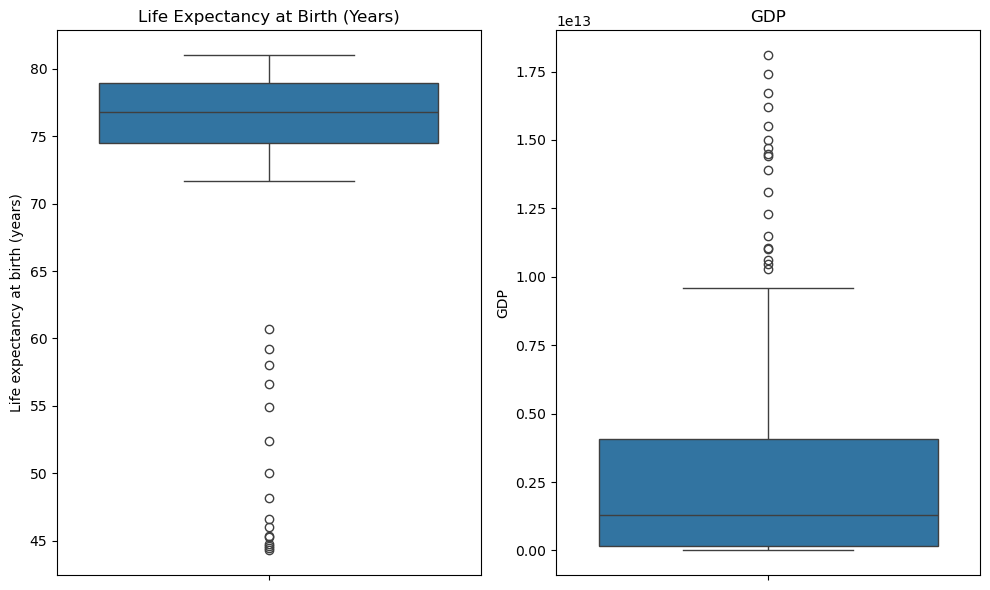

In [9]:
# Outlier Analysis
fig, axs = plt.subplots(1,2, figsize = (10,6))
plt1 = sns.boxplot(df['Life expectancy at birth (years)'], ax = axs[0])
plt2 = sns.boxplot(df['GDP'], ax = axs[1])
axs[0].set_title('Life Expectancy at Birth (Years)')
axs[1].set_title('GDP')

plt.tight_layout()

Even though there are outliers, they may likely be attributed to nation / holding significant value, so these won't be treated unless found to be necessary later on in the exploration.

### 3.3 Data Duplication

In [10]:
# Identify duplicate rows in the dataset.
df.duplicated().sum()

0

### 3.4 Data Distribution

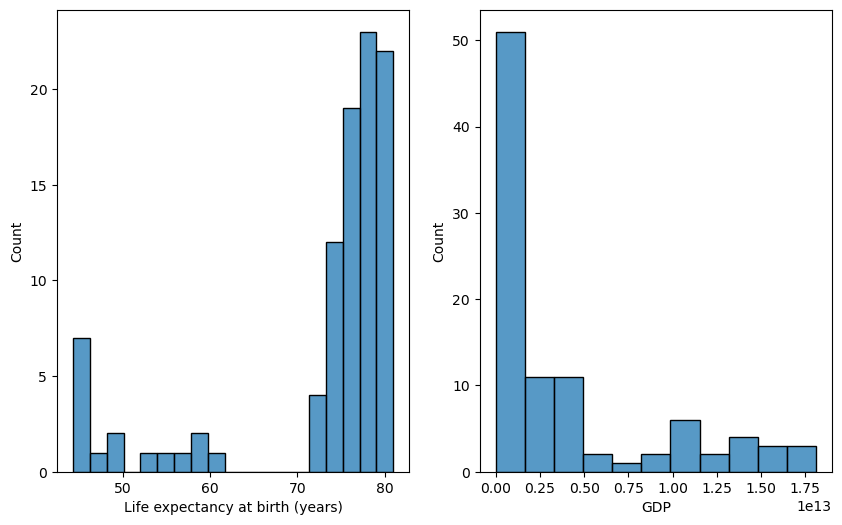

In [11]:
# visulize distribution using histograms
plt.figure(figsize = (10, 6))
plt.subplot(1,2,1)
sns.histplot(df['Life expectancy at birth (years)'])
plt.subplot(1,2,2)
sns.histplot(df['GDP'])
plt.show()

It's clear that GDP is right-skewed (the highest count is < 2.5 trillion / year). Also, a gap exists in life expectancy between approximately 62 and 71 years, with the large majority of life expectancy values between ~71 and ~81.

## 4. Data Visualization

### 4.1 Relationship Between Life Expectancy and GDP

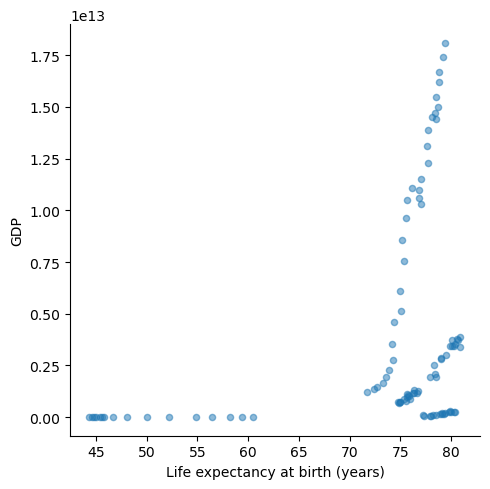

In [12]:
sns.lmplot(data = df, x = 'Life expectancy at birth (years)', y = 'GDP', x_jitter = 0.25, scatter_kws={"s": 20, "alpha":0.5}, fit_reg = False)
plt.show()

There appear to be several distinct groups of values on the plot. Since there are only six countries included in the data, I wonder if these groups represent different nations.

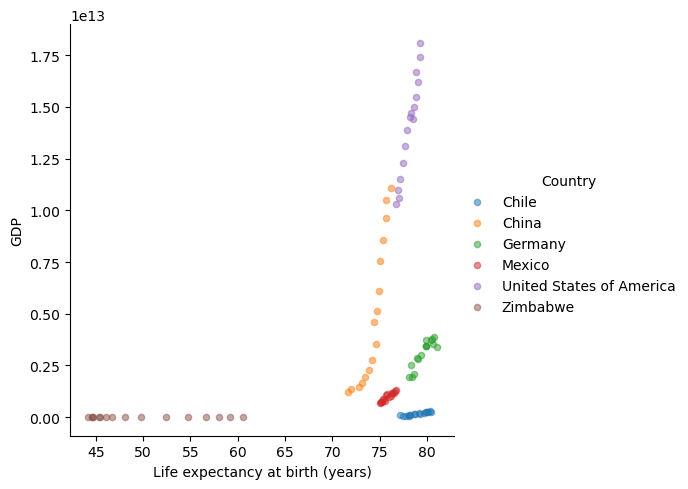

In [13]:
# duplicating the previous plot, but adding a hue for specific nation
sns.lmplot(data = df, x = 'Life expectancy at birth (years)', y = 'GDP', hue = 'Country', x_jitter = 0.25, scatter_kws={"s": 20, "alpha":0.5}, fit_reg = False)
plt.show()

Each cluster represents a country. There does appear to be a positive linear relationship within each cluser (with Zimbabwe as an outlier). Next, I want to see the mean life expectancy values per country.

### 4.2 Mean Life Expectancy Per Country

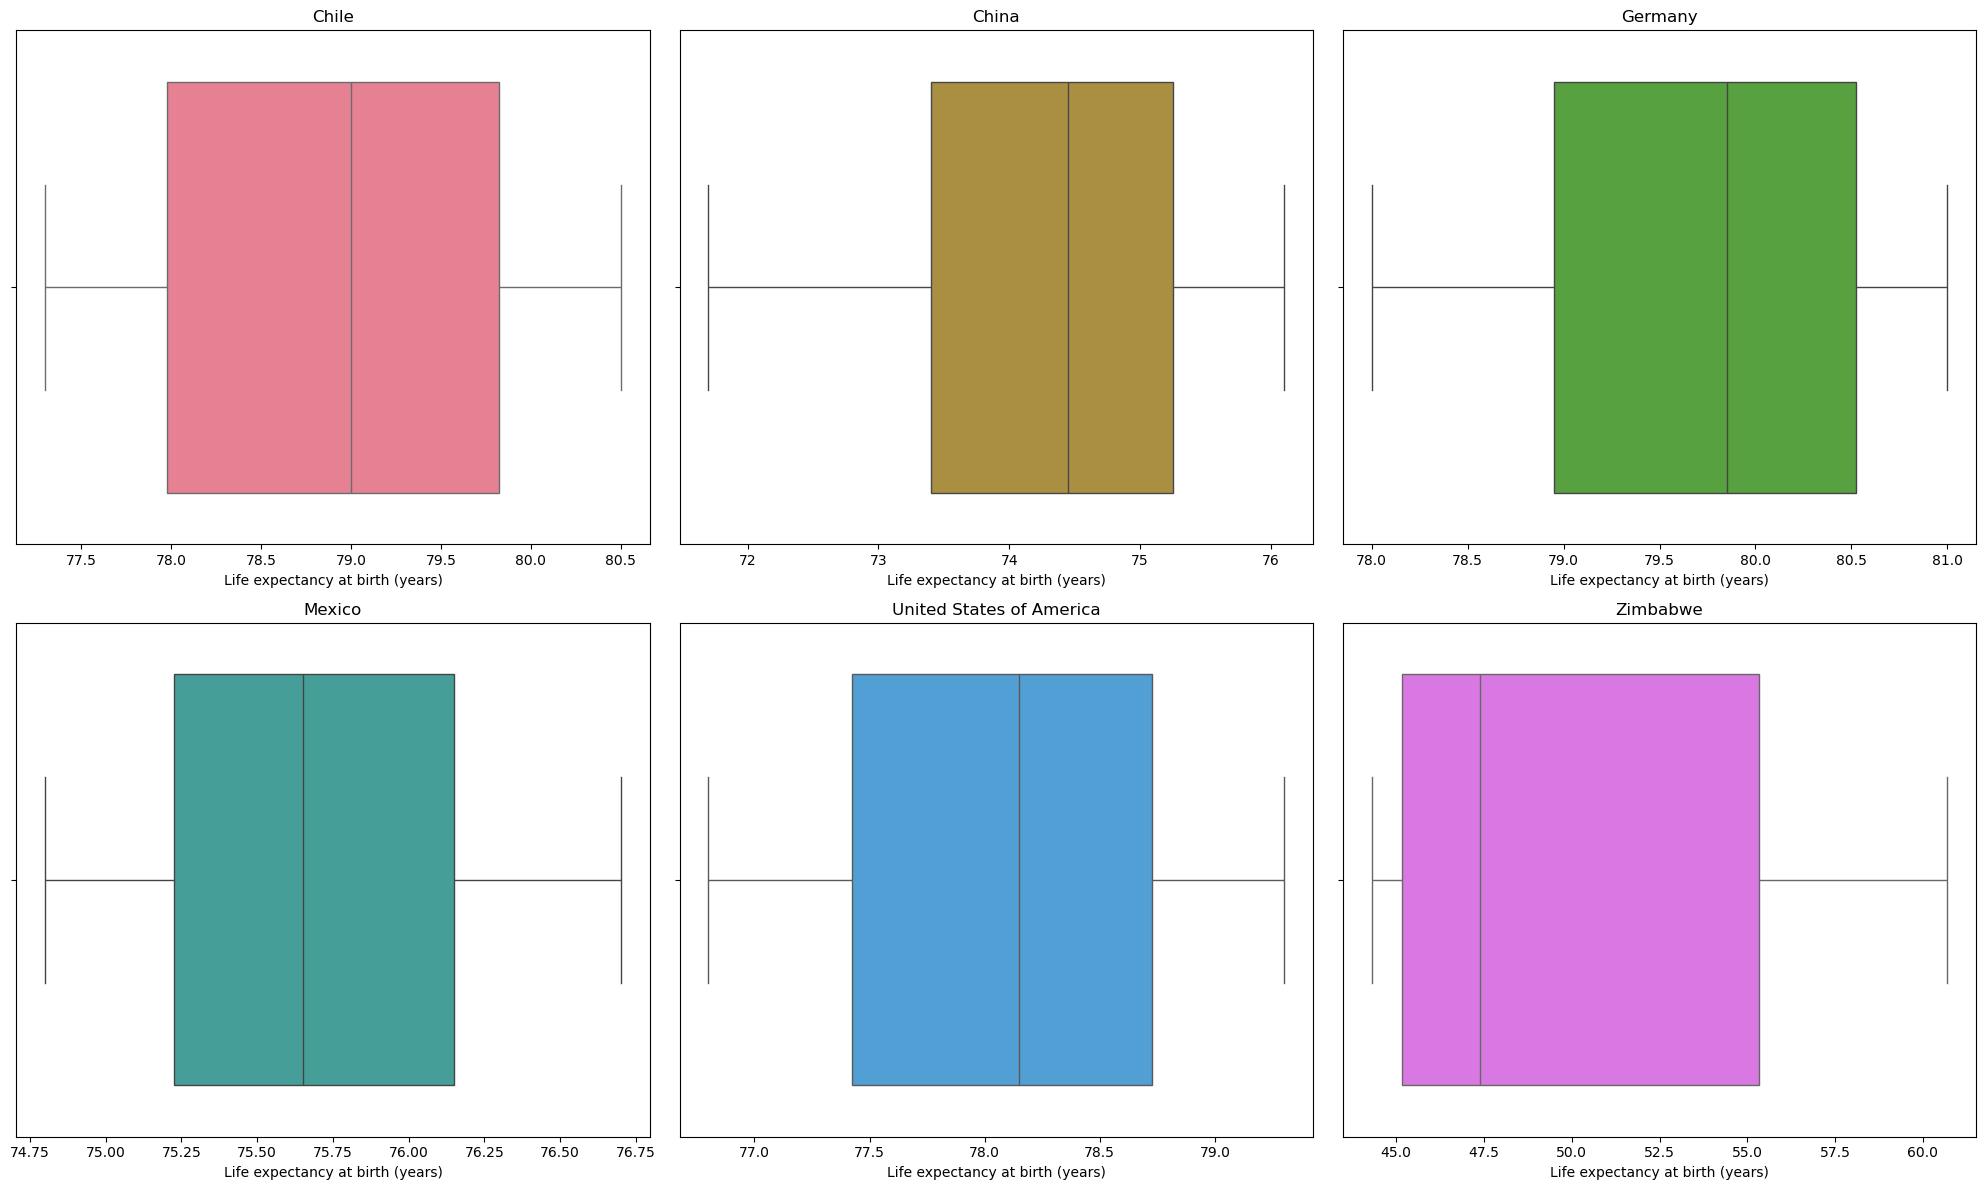

In [32]:
colors = sns.color_palette("husl", n_colors=len(df['Country'].unique()))
plt.figure(figsize=(20, 12))
n = 1

# Loop over unique countries
for country, color in zip(df['Country'].unique(), colors):
    plt.subplot(2, 3, n)
    sns.boxplot(data=df[df.Country == country], x='Life expectancy at birth (years)', color=color)
    plt.title(country)
    n += 1

# Show all plots at once
plt.tight_layout()
plt.show()

Germany, Chile, and the United States have the highest life expectancy values, with Germany having the highest life expectancy at both the 25th and 75th percentiles, as well as the highest median.

### 4.3 Relationship Between Observation Year and Life Expectancy Per Country

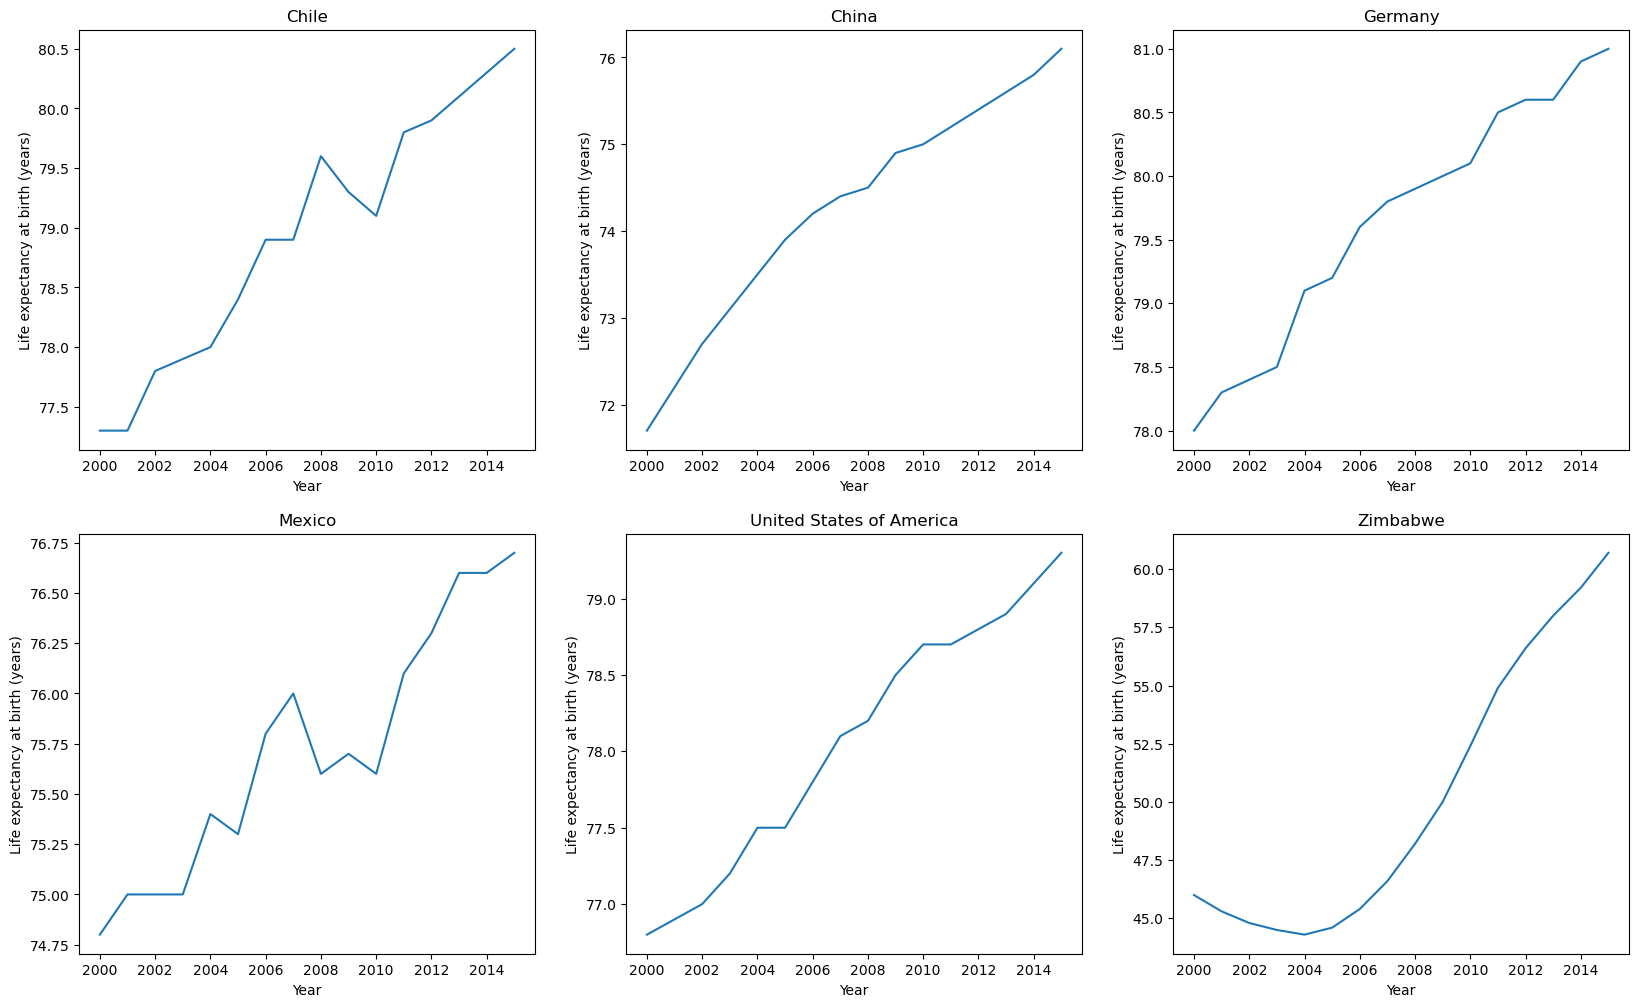

In [14]:
# line plots
plt.figure(figsize = (20, 12))
plt.subplot(2,3,1)
sns.lineplot(x = 'Year', y = 'Life expectancy at birth (years)', data = df[df.Country == 'Chile'])
plt.title('Chile')
plt.subplot(2,3,2)
sns.lineplot(x = 'Year', y = 'Life expectancy at birth (years)', data = df[df.Country == 'China'])
plt.title('China')
plt.subplot(2,3,3)
sns.lineplot(x = 'Year', y = 'Life expectancy at birth (years)', data = df[df.Country == 'Germany'])
plt.title('Germany')
plt.subplot(2,3,4)
sns.lineplot(x = 'Year', y = 'Life expectancy at birth (years)', data = df[df.Country == 'Mexico'])
plt.title('Mexico')
plt.subplot(2,3,5)
sns.lineplot(x = 'Year', y = 'Life expectancy at birth (years)', data = df[df.Country == 'United States of America'])
plt.title('United States of America')
plt.subplot(2,3,6)
sns.lineplot(x = 'Year', y = 'Life expectancy at birth (years)', data = df[df.Country == 'Zimbabwe'])
plt.title('Zimbabwe')
plt.show()

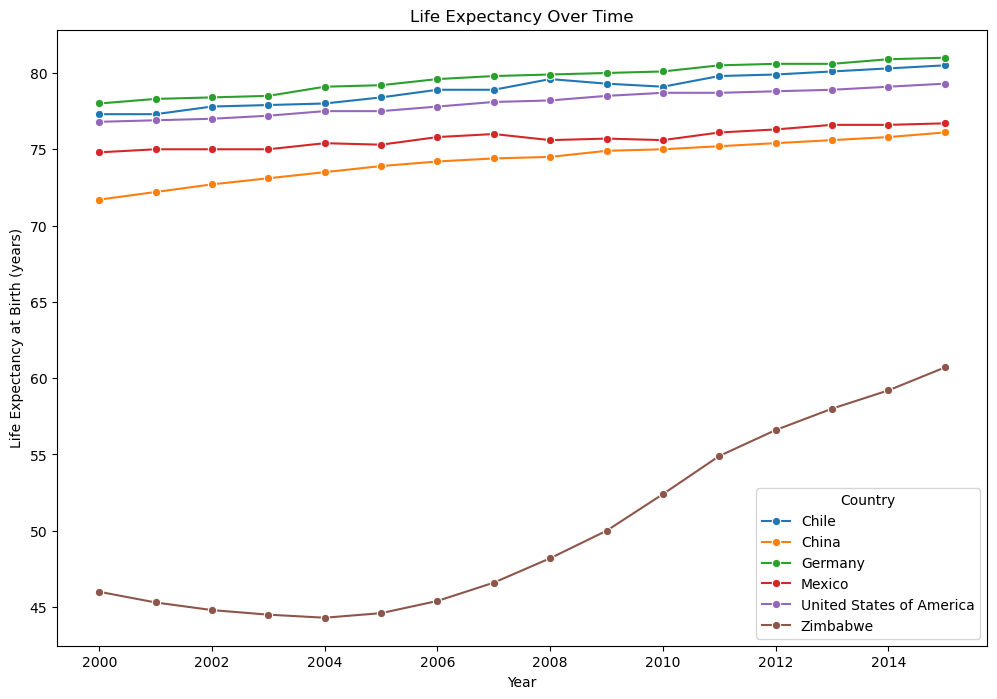

In [33]:
# Combined into a single plot
plt.figure(figsize=(12, 8))
sns.lineplot(data=df, x='Year', y='Life expectancy at birth (years)', hue='Country', marker='o')
plt.title('Life Expectancy Over Time')
plt.ylabel('Life Expectancy at Birth (years)')
plt.xlabel('Year')
plt.show()

The gap in life expectancy in the middle of the chart is demonstrated by the difference between Zimbabwe and the other five countries. There is a clear positive linear relationship between life expectancy and the year of observation.

### 4.4 Relationship Between Observation Year and GDP Per Country

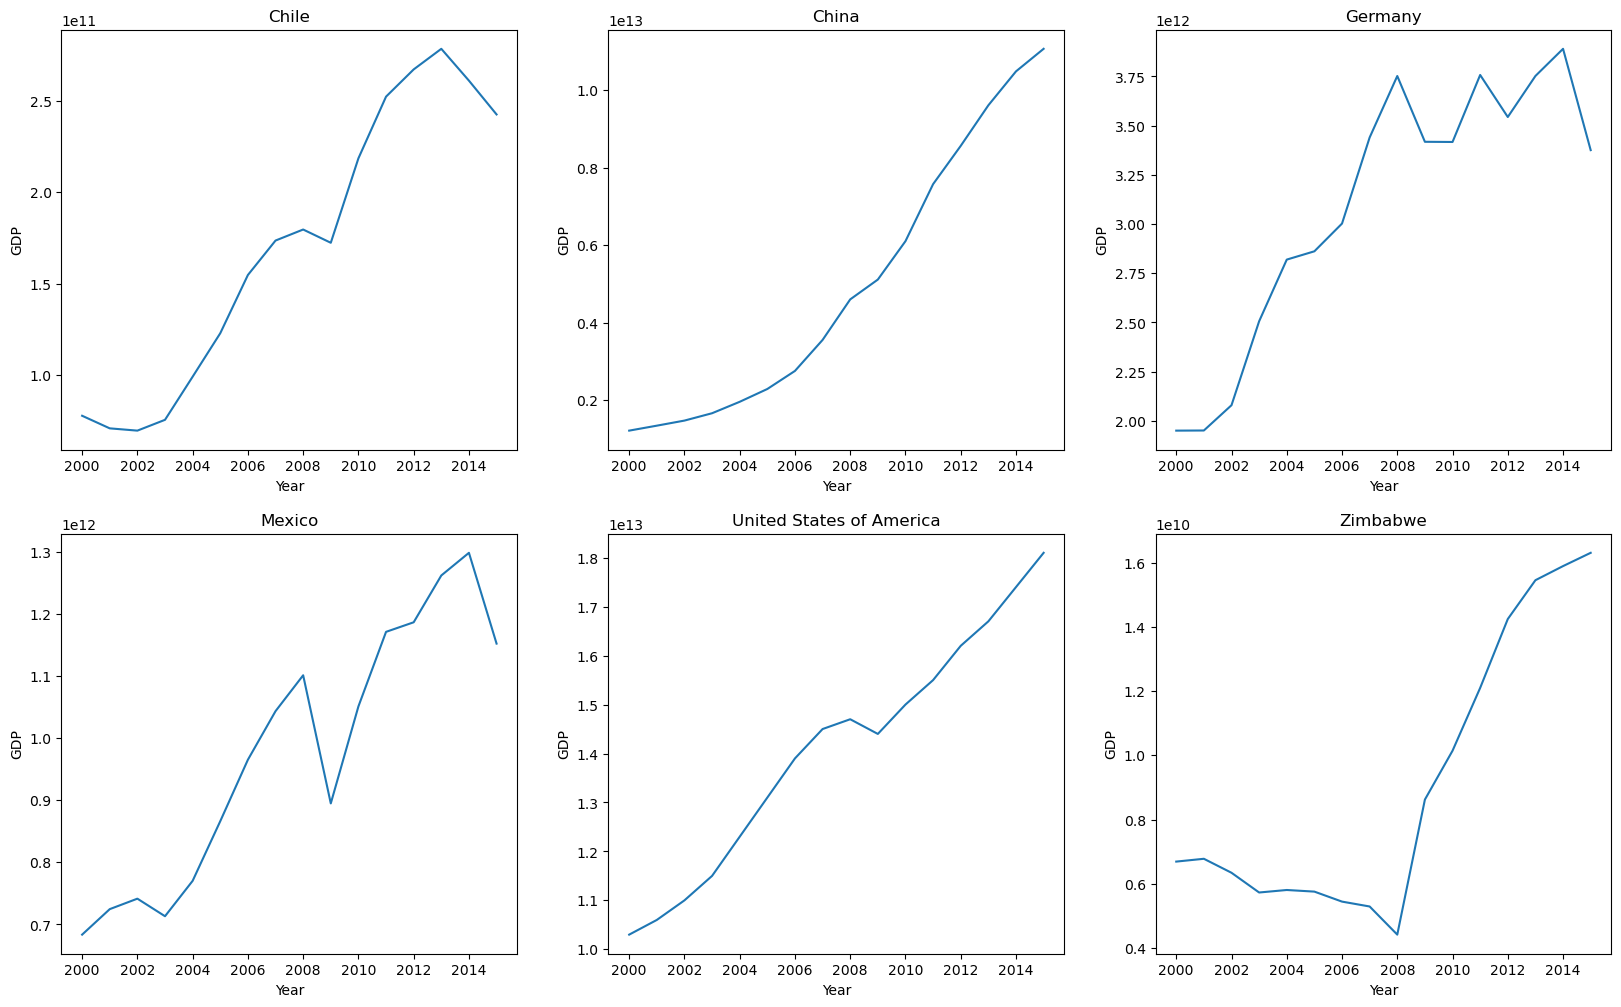

In [34]:
# line plots 
plt.figure(figsize = (20, 12))
plt.subplot(2,3,1)
sns.lineplot(x = 'Year', y = 'GDP', data = df[df.Country == 'Chile'])
plt.title('Chile')
plt.subplot(2,3,2)
sns.lineplot(x = 'Year', y = 'GDP', data = df[df.Country == 'China'])
plt.title('China')
plt.subplot(2,3,3)
sns.lineplot(x = 'Year', y = 'GDP', data = df[df.Country == 'Germany'])
plt.title('Germany')
plt.subplot(2,3,4)
sns.lineplot(x = 'Year', y = 'GDP', data = df[df.Country == 'Mexico'])
plt.title('Mexico')
plt.subplot(2,3,5)
sns.lineplot(x = 'Year', y = 'GDP', data = df[df.Country == 'United States of America'])
plt.title('United States of America')
plt.subplot(2,3,6)
sns.lineplot(x = 'Year', y = 'GDP', data = df[df.Country == 'Zimbabwe'])
plt.title('Zimbabwe')
plt.show()

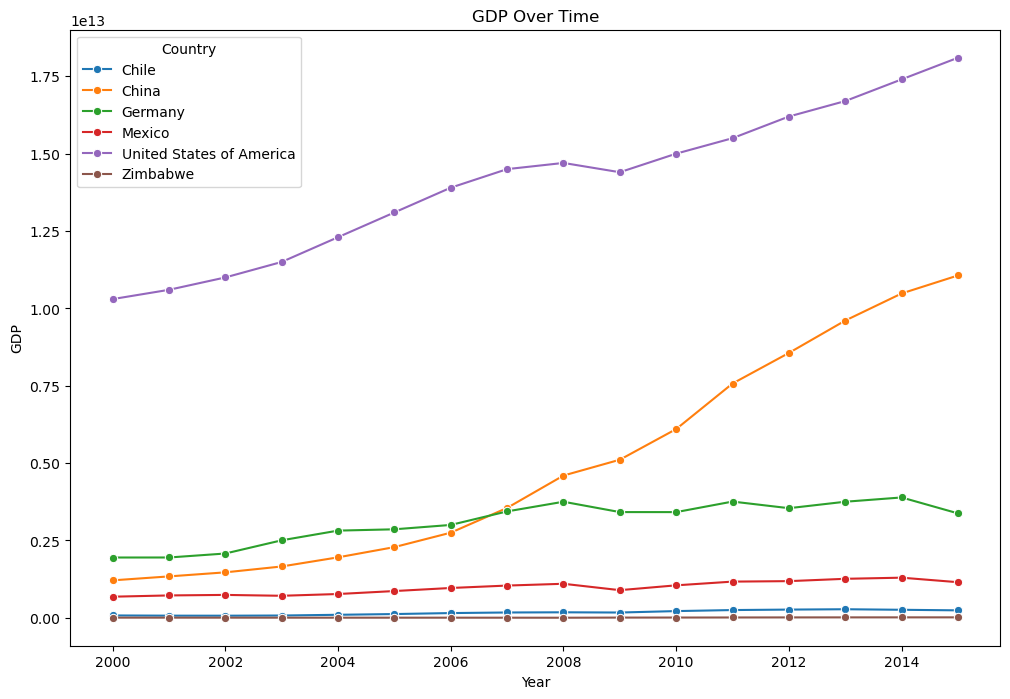

In [35]:
# Combined into a single plot
plt.figure(figsize=(12, 8))
sns.lineplot(data=df, x='Year', y='GDP', hue='Country', marker='o')
plt.title('GDP Over Time')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

There is also a positive linear relationship between GDP and year. But the substantial rates of GDP increase for the U.S. and China don't necessarily correlate with corresponding rates of increase in life expectancy.

### 4.5 Comparison Between GDP and Life Expectancy Charts Per Year

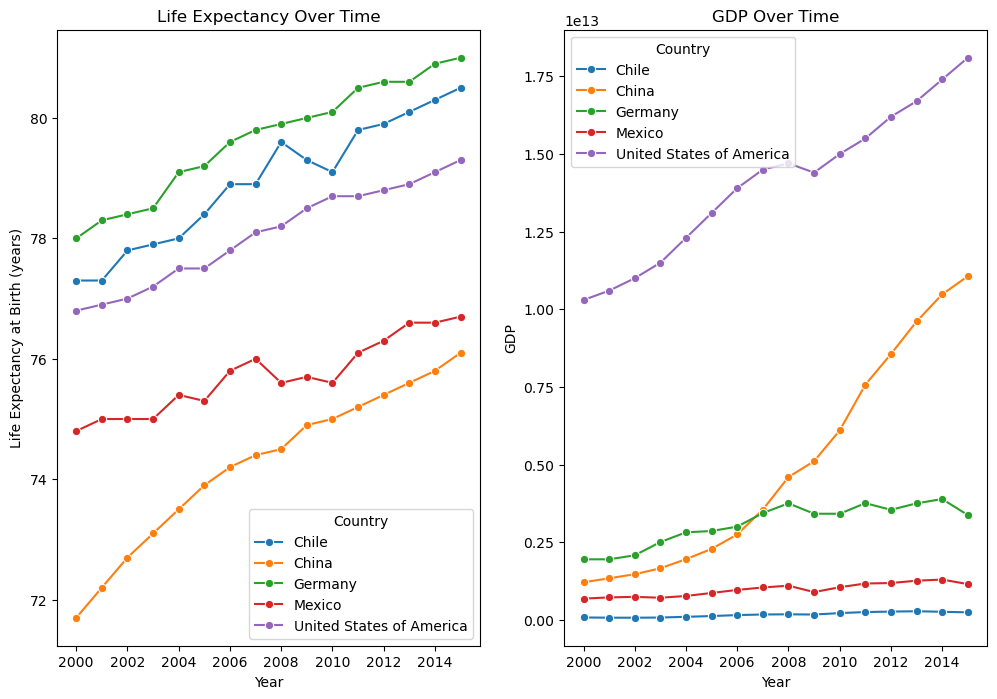

In [36]:
# Removing Zimbabwe from this comparison as the outlier
df2 = df[df.Country != 'Zimbabwe']

# Plot
plt.figure(figsize = (12, 8))
plt.subplot(1,2,1)
sns.lineplot(data=df2, x='Year', y='Life expectancy at birth (years)', hue='Country', marker='o')
plt.title('Life Expectancy Over Time')
plt.ylabel('Life Expectancy at Birth (years)')
plt.xlabel('Year')

plt.subplot(1,2,2)
sns.lineplot(data=df2, x='Year', y='GDP', hue='Country', marker='o')
plt.title('GDP Over Time')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

Seeing the plots side-by-side, it's clear that while Chile and Germany share a similar rate of increase over the years of observation as the United States in life expectancy, they have a drastically lower rate of increase in GDP as the United States. This makes me wonder if GDP isn't actually correlated with life expectancy, and that time is actually the more influential variable.

### 4.6 Putting this Observation into Numbers

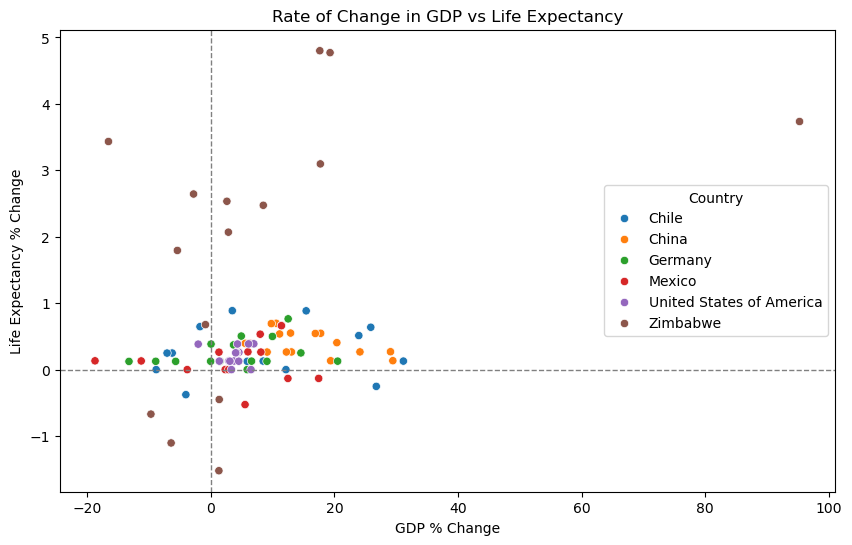

Correlation Coefficient: 0.2945208151267347


In [43]:
# Annual percentage change for GDP and life expectancy for each country
df['GDP_pct_change'] = df.groupby('Country')['GDP'].pct_change() * 100
df['Life_expectancy_pct_change'] = df.groupby('Country')['Life expectancy at birth (years)'].pct_change() * 100

# Plotting the relationship between the rate of change in GDP and life expectancy
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='GDP_pct_change', y='Life_expectancy_pct_change', hue='Country')
plt.title('Rate of Change in GDP vs Life Expectancy')
plt.xlabel('GDP % Change')
plt.ylabel('Life Expectancy % Change')
plt.axhline(0, color='grey', linestyle='--', linewidth=1)
plt.axvline(0, color='grey', linestyle='--', linewidth=1)
plt.show()

# Correlation coefficient
correlation = df[['GDP_pct_change', 'Life_expectancy_pct_change']].corr().iloc[0, 1]
print("Correlation Coefficient: {correlation}".format(correlation=correlation))

The correlation between GDP and Life Expectancy rates of change is weak. Countries such as Chile and Zimbabwe have seen consistent increases in life expectancy over time without corresponding increases in GDP, while countries such as the United States and China have seen substantial growth in GDP while this rate of change has not been reflected in life expectancy. Factors such as technological advancements in medicine over the 15 years of the study, access to medical care, advances in worldwide communication over the internet, or other factors may play a more prominent role in the increase in life expectancy displayed over the course of the time period that has been observed.